In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import silhouette_score

In [3]:
df = pd.read_csv('patient_priority.csv', index_col=0)

df = df.drop('triage' , axis=1)

In [4]:
df.head()

,age,gender,chest pain type,blood pressure,cholesterol,max heart rate,exercise angina,plasma glucose,skin_thickness,insulin,bmi,diabetes_pedigree,hypertension,heart_disease,Residence_type,smoking_status
0,40.0,1.0,2.0,140.0,294.0,172.0,0.0,108.0,43.0,92.0,19.0,0.467386,0.0,0.0,Urban,never smoked
1,49.0,0.0,3.0,160.0,180.0,156.0,0.0,75.0,47.0,90.0,18.0,0.467386,0.0,0.0,Urban,never smoked
2,37.0,1.0,2.0,130.0,294.0,156.0,0.0,98.0,53.0,102.0,23.0,0.467386,0.0,0.0,Urban,never smoked
3,48.0,0.0,4.0,138.0,214.0,156.0,1.0,72.0,51.0,118.0,18.0,0.467386,0.0,0.0,Urban,never smoked
4,54.0,1.0,3.0,150.0,195.0,156.0,0.0,108.0,90.0,83.0,21.0,0.467386,0.0,0.0,Urban,never smoked


In [3]:
df.describe()

,age,gender,chest pain type,blood pressure,cholesterol,max heart rate,exercise angina,plasma glucose,skin_thickness,insulin,bmi,diabetes_pedigree,hypertension,heart_disease
count,6962.000000,6961.000000,6962.000000,6962.000000,6962.000000,6962.000000,6962.000000,6962.000000,6962.000000,6962.000000,6962.000000,6962.000000,6962.000000,6962.000000
mean,57.450014,0.531964,0.529015,109.629991,184.711290,163.502442,0.061764,98.394283,56.813416,111.091640,27.190908,0.467386,0.071531,0.039500
std,11.904948,0.499013,1.253791,21.534852,32.010359,15.458693,0.240743,28.598084,22.889316,17.470033,7.362886,0.102663,0.257729,0.194796
min,28.000000,0.000000,0.000000,60.000000,150.000000,138.000000,0.000000,55.120000,21.000000,81.000000,10.300000,0.078000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,92.000000,164.000000,150.000000,0.000000,78.707500,36.000000,97.000000,21.800000,0.467386,0.000000,0.000000
50%,56.000000,1.000000,0.000000,111.000000,179.000000,163.000000,0.000000,93.000000,55.000000,111.000000,26.200000,0.467386,0.000000,0.000000
75%,66.000000,1.000000,0.000000,127.000000,192.000000,177.000000,0.000000,111.632500,77.000000,125.000000,31.000000,0.467386,0.000000,0.000000
max,82.000000,1.000000,4.000000,165.000000,294.000000,202.000000,1.000000,199.000000,99.000000,171.000000,66.800000,2.420000,1.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6962 entries, 0 to 5109
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                6962 non-null   float64
 1   gender             6961 non-null   float64
 2   chest pain type    6962 non-null   float64
 3   blood pressure     6962 non-null   float64
 4   cholesterol        6962 non-null   float64
 5   max heart rate     6962 non-null   float64
 6   exercise angina    6962 non-null   float64
 7   plasma glucose     6962 non-null   float64
 8   skin_thickness     6962 non-null   float64
 9   insulin            6962 non-null   float64
 10  bmi                6962 non-null   float64
 11  diabetes_pedigree  6962 non-null   float64
 12  hypertension       6962 non-null   float64
 13  heart_disease      6962 non-null   float64
 14  Residence_type     6962 non-null   object 
 15  smoking_status     6962 non-null   object 
dtypes: float64(14), object(2

In [5]:
df.isna().sum()

age                  0
gender               1
chest pain type      0
blood pressure       0
cholesterol          0
max heart rate       0
exercise angina      0
plasma glucose       0
skin_thickness       0
insulin              0
bmi                  0
diabetes_pedigree    0
hypertension         0
heart_disease        0
Residence_type       0
smoking_status       0
dtype: int64

In [6]:
df.dropna(0, inplace=True)

C:\Users\suraj\anaconda3\envs\unsup\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  """Entry point for launching an IPython kernel.


In [7]:
df = df.drop_duplicates()

In [8]:
df.duplicated().sum()

0

In [9]:
# Reset the index to ensure no duplicate row indices
df = df.reset_index(drop=True)

In [10]:
df_dummies = pd.get_dummies(df, columns=['Residence_type','smoking_status'])

In [11]:
df_dummies

,age,gender,chest pain type,blood pressure,cholesterol,max heart rate,exercise angina,plasma glucose,skin_thickness,insulin,bmi,diabetes_pedigree,hypertension,heart_disease,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,40.0,1.0,2.0,140.0,294.0,172.0,0.0,108.00,43.0,92.0,19.0,0.467386,0.0,0.0,0,1,0,0,1,0
1,49.0,0.0,3.0,160.0,180.0,156.0,0.0,75.00,47.0,90.0,18.0,0.467386,0.0,0.0,0,1,0,0,1,0
2,37.0,1.0,2.0,130.0,294.0,156.0,0.0,98.00,53.0,102.0,23.0,0.467386,0.0,0.0,0,1,0,0,1,0
3,48.0,0.0,4.0,138.0,214.0,156.0,1.0,72.00,51.0,118.0,18.0,0.467386,0.0,0.0,0,1,0,0,1,0
4,54.0,1.0,3.0,150.0,195.0,156.0,0.0,108.00,90.0,83.0,21.0,0.467386,0.0,0.0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6956,80.0,0.0,0.0,111.0,153.0,166.0,0.0,83.75,31.0,108.0,18.6,0.467386,1.0,0.0,0,1,0,0,1,0
6957,81.0,0.0,0.0,123.0,157.0,160.0,0.0,125.20,23.0,89.0,40.0,0.467386,0.0,0.0,0,1,0,0,1,0
6958,81.0,0.0,0.0,127.0,185.0,141.0,0.0,82.99,41.0,95.0,30.6,0.467386,0.0,0.0,1,0,0,0,1,0
6959,51.0,1.0,0.0,123.0,161.0,162.0,0.0,166.29,34.0,93.0,25.6,0.467386,0.0,0.0,1,0,0,1,0,0


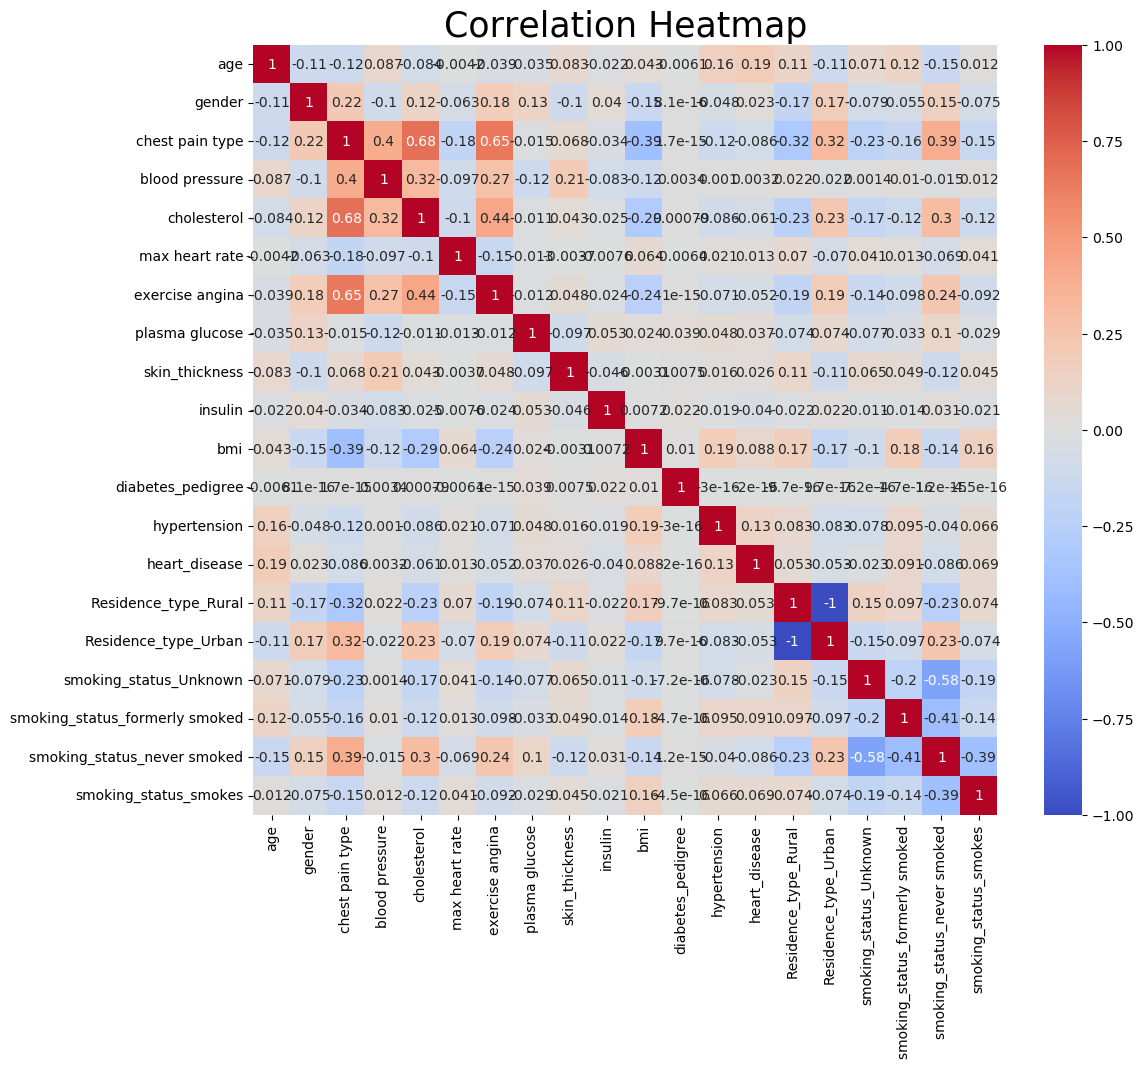

In [12]:
# Heatmap of correlations between the columns
plt.figure(figsize=(12, 10))
sns.heatmap(df_dummies.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap', fontsize=25)
plt.show()

In [13]:
# sns.pairplot(df)
# plt.title("PairPlot", fontsize=25)
# plt.show()

In [14]:
# Creating MinMaxScaler() object
scaler = MinMaxScaler()

# Fit the scaler to the data. 
scaler.fit(df_dummies)

# Transform the data and store in new DataFrame
df_scaled = pd.DataFrame(scaler.transform(df_dummies), columns=df_dummies.columns)
df_scaled.head()

,age,gender,chest pain type,blood pressure,cholesterol,max heart rate,exercise angina,plasma glucose,skin_thickness,insulin,bmi,diabetes_pedigree,hypertension,heart_disease,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0.222222,1.0,0.50,0.761905,1.000000,0.53125,0.0,0.367528,0.282051,0.122222,0.153982,0.166262,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.388889,0.0,0.75,0.952381,0.208333,0.28125,0.0,0.138171,0.333333,0.100000,0.136283,0.166262,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.166667,1.0,0.50,0.666667,1.000000,0.28125,0.0,0.298026,0.410256,0.233333,0.224779,0.166262,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.370370,0.0,1.00,0.742857,0.444444,0.28125,1.0,0.117320,0.384615,0.411111,0.136283,0.166262,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.481481,1.0,0.75,0.857143,0.312500,0.28125,0.0,0.367528,0.884615,0.022222,0.189381,0.166262,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
model = DBSCAN().fit(df_scaled)

In [34]:
# Define the parameter grid
param_grid = {
    'eps': [0.5,1,1.1],
    'min_samples' : [1,2,3,4]
    }

best_score = -1
best_params = None

# Initialize a dictionary to store silhouette scores for each parameter combination
silhouette_scores = []
score_df = pd.DataFrame()

for params in ParameterGrid(param_grid):
    # Create the Agglomerative Clustering model
    model = DBSCAN(eps = params['eps'], min_samples= params['min_samples']).fit(df_scaled)
    
    # Calculate silhouette score (or other metrics)
    score = silhouette_score(df_scaled, model.labels_)
    
    # Append the score and the corresponding parameters
    silhouette_scores.append((params, score))

       # Compare and store best model
    if score > best_score:
        best_score = score
        best_params = params

    # Storing the scores with params in a DataFrame
    params_temp = params.copy()
    params_temp['score'] = score
    score_df = pd.concat([score_df, pd.DataFrame(params_temp, index=[0])], ignore_index=True)

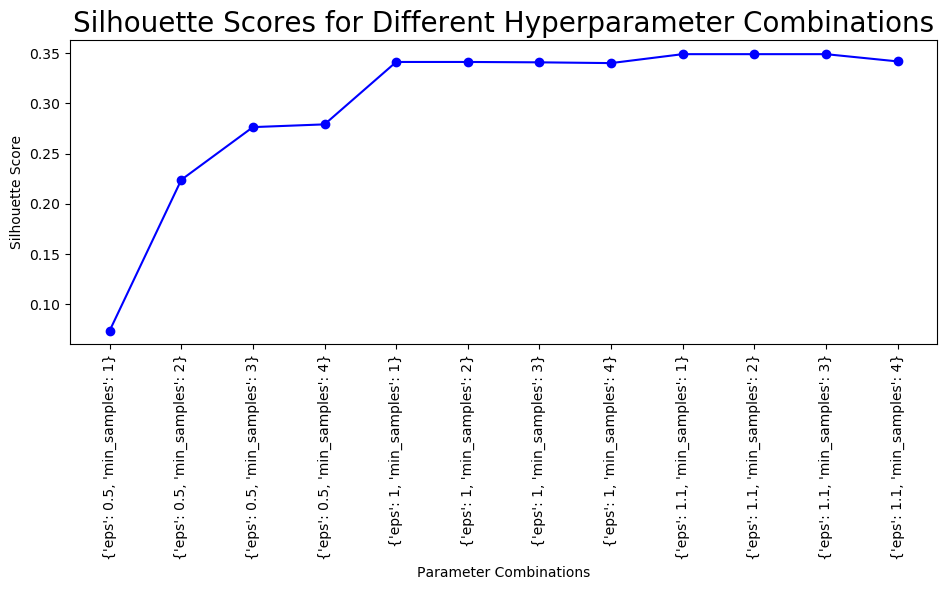

In [35]:
# Extract scores and params for plotting
scores = [score for _, score in silhouette_scores]
params = [str(param) for param, _ in silhouette_scores]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(range(len(scores)), scores, marker='o', linestyle='-', color='b')
plt.xticks(range(len(params)), params, rotation=90)  # Set the x-tick labels to the parameter combinations
plt.xlabel('Parameter Combinations')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different Hyperparameter Combinations', size=20)
plt.tight_layout()
plt.show()